<center><h1><b><i>3DP_2 - MISSING VALUES HANDLING</i></b></h1></center>


# **AGENDA**:

> Consulte **Table of contents**.


___
# **REFERÊNCIAS**
* [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
* [Handling Missing Data for a Beginner](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436)

___
# **3DP_MISSING VALUES HANDLING**

> Lidar com Missing Values é um dos piores pesadelos de um Cientista de dados. Especialmente, se o número de MV for grande o suficiente (geralmente acima de 5%). Nesse caso, os valores não podem ser descartados e um Cientista de Dados inteligente deve "imputar" os valores ausentes.

* Nesta sessão, vamos identificar, analisar e tratar Missing Values (MV).
* Como MV são gerados?
    * Usuário se esqueceu de preencher ou preencheu errado o campo;
    * Os dados foram perdidos durante a transferência manual de um banco de dados legado;
    * Erro de programação;
    * Os usuários optaram por não preencher um campo vinculado a suas crenças sobre como os resultados seriam usados ou interpretados.
* As funções df.isnull() e df.isna() são apropriadas para nos indicar quantas observações são MV no dataframe.

* Na prática:
    * Variáveis Contínuas/Numéricas - Podemos substituir os NaN por Média/Mediana/Moda;
	* Variáveis Categóricas - Uma alternativa é atribuir uma categoria inexistente como, por exemplo "MV" para indicar o NaN.


___
# **MACHINE LEARNING COM PYTHON (Scikit-Learn)**

![Scikit-Learn](https://github.com/MathMachado/Materials/blob/master/scikit-learn-1.png?raw=true)

## Carregar as biliotecas

In [82]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# remove warnings to keep notebook clean
import warnings
warnings.filterwarnings('ignore')

## Dataframes
* O dataframe abaixo foi gerado aleatoriamente para entendermos como lidar com os NaN's.

In [ ]:
df= pd.DataFrame({
    'idade': [32,38,np.nan,37,np.nan,36,38,32,0,np.nan],
    'salario': ['High', 'High', 'High', 'Low', 'Low', 'High', np.nan, 'Medium', 'Medium', 'High'],
    'pais': ['Spain', 'France', 'France', np.nan, 'Germany', 'France', 'Spain', 'France', np.nan, 'Spain']})

df

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
3,37.0,Low,NaN
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,NaN,High,Spain


## Identificar os NaN's

A função df.isna() será usada para identificarmos os NaN's nos dataframes. Por exemplo:

In [ ]:
df.isna()

,idade,salario,pais
0,False,False,False
1,False,False,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,False,False
6,False,True,False
7,False,False,False
8,False,False,True
9,True,False,False


Qual a interpretação deste output?

Para um dataframe muito grande, vamos usar a expressão abaixo:

In [ ]:
df.isna().any()

idade      True
salario    True
pais       True
dtype: bool

In [ ]:
df.isna().sum()

idade      3
salario    1
pais       2
dtype: int64

In [ ]:
#df.loc[pd.isnull(df['idade'])]

df[df['idade'].isna()]

,idade,salario,pais
2,NaN,High,France
4,NaN,Low,Germany
9,NaN,High,Spain


Mais prático não é? No entanto, vamos utilizar a função abaixo, que nos ajudará mais com os NaN's:

In [ ]:
def mostra_missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = 100*round((df.isnull().sum()/df.isnull().count()).sort_values(ascending = False), 2)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percentual'])
    print(missing_data.head(10))

In [ ]:
mostra_missing_value(df)

         Total  Percentual
idade        3        30.0
pais         2        20.0
salario      1        10.0


## A função df.dropna()
* Esta função deleta as instâncias (linhas do dataframes) onde há pelo menos 1 NaN.

In [ ]:
df2 = df.dropna()
df2

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
5,36.0,High,France
7,32.0,Medium,France


Como podemos ver, somente as instâncias 0, 1, 5 e 7 tem atributos não NaN's.

Uma forma menos severa seria:

In [ ]:
df3 = df.dropna(axis = 0, subset = ['pais'])
df3

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
9,NaN,High,Spain


* Saberias explicar o que o comando acima fez?

## Tratar os NaN's de Variáveis Numéricas
* Neste exemplo, vou substituir os NaN's da variável 'idade' pela mediana. No entanto, responda a seguinte pergunta:
    * Faz sendido idade= 0?

In [ ]:
df

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
3,37.0,Low,NaN
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,NaN,High,Spain


In [ ]:
 df['idade'].fillna(df['idade'].median(), inplace = True)
 df

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,36.0,High,France
3,37.0,Low,NaN
4,36.0,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,36.0,High,Spain


In [ ]:
df4= pd.DataFrame({
    'idade': [32,38,np.nan,37,np.nan,36,38,32,0,np.nan],
    'salario': ['High', 'High', 'High', 'Low', 'Low', 'High', np.nan, 'Medium', 'Medium', 'High'],
    'pais': ['Spain', 'France', 'France', np.nan, 'Germany', 'France', 'Spain', 'France', np.nan, 'Spain']})

df4

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
3,37.0,Low,NaN
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,NaN,High,Spain


In [ ]:
""" Para substituir todos os valores faltante pela média em cada coluna"""

df4.fillna(df4.median(), inplace = True)
df4

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,36.0,High,France
3,37.0,Low,NaN
4,36.0,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,36.0,High,Spain


Acho que a resposta é não. Então, neste caso, 0 é um NaN. Vamos substituído pela mediana da variável:

In [41]:
df= pd.DataFrame({
    'idade': [32,38,np.nan,37,np.nan,36,38,32,0,np.nan],
    'salario': ['High', 'High', 'High', 'Low', 'Low', 'High', np.nan, 'Medium', 'Medium', 'High'],
    'pais': ['Spain', 'France', 'France', np.nan, 'Germany', 'France', 'Spain', 'France', np.nan, 'Spain']})
df

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
3,37.0,Low,NaN
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,NaN,High,Spain


In [42]:
df['idade2'] = df['idade'].replace({0: df['idade'].median()})
df

,idade,salario,pais,idade2
0,32.0,High,Spain,32.0
1,38.0,High,France,38.0
2,NaN,High,France,NaN
3,37.0,Low,NaN,37.0
4,NaN,Low,Germany,NaN
5,36.0,High,France,36.0
6,38.0,NaN,Spain,38.0
7,32.0,Medium,France,32.0
8,0.0,Medium,NaN,36.0
9,NaN,High,Spain,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    7 non-null      float64
 1   salario  9 non-null      object 
 2   pais     8 non-null      object 
 3   idade2   7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


Como podemos verificar acima na variável 'idade2', o valor 0 foi substituído pela mediana da variável 'idade'.

Vamos verificar a média da variável antes da operação:

In [ ]:
df['idade2'].mean()

35.57142857142857

In [ ]:
df['idade3'] = df['idade2']
df

,idade,salario,pais,idade2,idade3
0,32.0,High,Spain,32.0,32.0
1,38.0,High,France,38.0,38.0
2,NaN,High,France,NaN,NaN
3,37.0,Low,NaN,37.0,37.0
4,NaN,Low,Germany,NaN,NaN
5,36.0,High,France,36.0,36.0
6,38.0,NaN,Spain,38.0,38.0
7,32.0,Medium,France,32.0,32.0
8,0.0,Medium,NaN,36.0,36.0
9,NaN,High,Spain,NaN,NaN


Aplicamos a operação:

In [ ]:
df['idade3'].fillna(df['idade3'].median(), inplace = True)
df

,idade,salario,pais,idade2,idade3
0,32.0,High,Spain,32.0,32.0
1,38.0,High,France,38.0,38.0
2,NaN,High,France,NaN,36.0
3,37.0,Low,NaN,37.0,37.0
4,NaN,Low,Germany,NaN,36.0
5,36.0,High,France,36.0,36.0
6,38.0,NaN,Spain,38.0,38.0
7,32.0,Medium,France,32.0,32.0
8,0.0,Medium,NaN,36.0,36.0
9,NaN,High,Spain,NaN,36.0


Podemos observar que os valores NaN's do atributo 'idade3' foi substituído pelo valor 36.

E agora, a média após a operação:

In [ ]:
df['idade3'].mean()

35.7

* Qual a conclusão?
    * Houve muito impacto na distribuição da variável 'idade'?

## **Tratar NaN's de Variáveis Categóricas**
* Observe a variável 'pais'. Temos alguns NaN's. As alternativas que temos são:
    * substituir os NaN's desta variável pela**moda** (valor mais frequente) da distribuição.
    * substiruir os NaN's por **'Undefined**'.

Qual o valor (no caso, País) mais frequente ?

In [ ]:
df

,idade,salario,pais,idade2,idade3
0,32.0,High,Spain,32.0,32.0
1,38.0,High,France,38.0,38.0
2,NaN,High,France,NaN,36.0
3,37.0,Low,NaN,37.0,37.0
4,NaN,Low,Germany,NaN,36.0
5,36.0,High,France,36.0,36.0
6,38.0,NaN,Spain,38.0,38.0
7,32.0,Medium,France,32.0,32.0
8,0.0,Medium,NaN,36.0,36.0
9,NaN,High,Spain,NaN,36.0


In [ ]:
df.pais.value_counts()

France     4
Spain      3
Germany    1
Name: pais, dtype: int64

Ok, a instância 'France' é o mais frequente. Então vamos substituir os NaN's por 'France'. De forma automática, temos:

In [ ]:
s_pais_mais_frequente = df['pais'].mode()[0]
s_pais_mais_frequente

'France'

In [ ]:
df["pais2"] = df["pais"]
df["pais2"] = df["pais2"].fillna(s_pais_mais_frequente)
df

,idade,salario,pais,idade2,idade3,pais2
0,32.0,High,Spain,32.0,32.0,Spain
1,38.0,High,France,38.0,38.0,France
2,NaN,High,France,NaN,36.0,France
3,37.0,Low,NaN,37.0,37.0,France
4,NaN,Low,Germany,NaN,36.0,Germany
5,36.0,High,France,36.0,36.0,France
6,38.0,NaN,Spain,38.0,38.0,Spain
7,32.0,Medium,France,32.0,32.0,France
8,0.0,Medium,NaN,36.0,36.0,France
9,NaN,High,Spain,NaN,36.0,Spain


In [ ]:
# df["pais3"] = df["pais"].fillna('pais_mv')

In [ ]:
# df

# **EXERCÍCIOS**


## Exercício 1
* Trate os NaN's da variável 'salario'.

In [4]:
df= pd.DataFrame({
    'idade': [32,38,np.nan,37,np.nan,36,38,32,0,np.nan],
    'salario': ['High', 'High', 'High', 'Low', 'Low', 'High', np.nan, 'Medium', 'Medium', 'High'],
    'pais': ['Spain', 'France', 'France', np.nan, 'Germany', 'France', 'Spain', 'France', np.nan, 'Spain']})
df

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
3,37.0,Low,NaN
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,NaN,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,NaN,High,Spain


In [6]:
df.salario.value_counts()

High      5
Low       2
Medium    2
Name: salario, dtype: int64

In [11]:
df["salario"].fillna(df['salario'].mode()[0], inplace = True)
df

,idade,salario,pais
0,32.0,High,Spain
1,38.0,High,France
2,NaN,High,France
3,37.0,Low,NaN
4,NaN,Low,Germany
5,36.0,High,France
6,38.0,High,Spain
7,32.0,Medium,France
8,0.0,Medium,NaN
9,NaN,High,Spain


## Exercício 2 - Diabetes
* Carregue o dataframe diabeletes.csv e trate os NaN's.

In [2]:
url = 'https://raw.githubusercontent.com/amgonca2019/DSWP/master/Dataframes/diabetes.csv'
df_diab = pd.read_csv(url)

In [3]:
df_diab.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Sintaxes para localzar valores insconsistentes( neste caso valores = 0)

# (df_diab.iloc[:] == 0).any()

# (df_diab.loc[:] == 0).any()

(df_diab[ : ] == 0).sum()

# (df_diab.iloc[ : ] == 0).sum()

# (df_diab.loc[ : ] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
df_diab[df_diab['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
df_diab['Glucose'].median()

117.0

### Carregar o dataframe

**Dica**: Algumas medidas não fazem sentido seram nulas (0). Portanto, os NaN's aqui neste dataframe são o valor 0. Portanto, substitua os NaN's (no caso, 0)das variáveis ***Glucose, BloodPressure, SkinThickness, Insulin e BMI*** por alguma medida como, por exemplo, média, mediana, moda e etc.

In [48]:
df_diab.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
# sub0 = {0:df_diab['Glucose'].median(), 0:df_diab['BloodPressure'].median() , 0:df_diab['SkinThickness'].median(), 0:df_diab['Insulin'].median(), 0:df_diab['BMI'].median()}
Gluco = df_diab['Glucose'].median()
df_diab['Glucose'].replace(0, Gluco, inplace = True)
df_diab.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
(df_diab.loc[:] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
df_diab['Glucose'].median()

117.0

In [13]:
df_diab.iloc[340:351, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
340,1,130,70,13,105,25.9,0.472,22,0
341,1,95,74,21,73,25.9,0.673,36,0
342,1,117,68,35,0,32.0,0.389,22,0
343,5,122,86,0,0,34.7,0.290,33,0
344,8,95,72,0,0,36.8,0.485,57,0
345,8,126,88,36,108,38.5,0.349,49,0
346,1,139,46,19,83,28.7,0.654,22,0
347,3,116,0,0,0,23.5,0.187,23,0
348,3,99,62,19,74,21.8,0.279,26,0
349,5,117,80,32,0,41.0,0.346,37,1


In [126]:
df_diab['BloodPressure'].median()  # Contunaur exercicio depois

72.0

## Exercício 3 - Titanic
> Trate os NaN's do dataframe Titanic_With_MV.csv.

In [77]:
url = "https://raw.githubusercontent.com/amgonca2019/DSWP/master/Dataframes/Titanic_With_MV.csv"
df_Titan_MV = pd.read_csv(url, index_col= 'PassengerId')


In [88]:
pd.set_option('display.max_rows', 100)

In [89]:
df_Titan_MV

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",W,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [65]:
df_Titan_MV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [72]:
# Verificando os MV

df_Titan_MV.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [73]:
df_Titan_MV.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [41]:
# Criando uma função para mostrar os missing values em precentuais

def mostra_missing_value(df_Titan_MV):
    total = df_Titan_MV.isnull().sum().sort_values(ascending = False)
    percent = 100*round((df_Titan_MV.isnull().sum()/df_Titan_MV.isnull().count()).sort_values(ascending = False), 2)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percentual'])
    print(missing_data.head(10))

In [80]:
mostra_missing_value(df_Titan_MV)

          Total  Percentual
Cabin       687        77.0
Age         177        20.0
Embarked      2         0.0
Fare          0         0.0
Ticket        0         0.0
Parch         0         0.0
SibSp         0         0.0
Sex           0         0.0
Name          0         0.0
Pclass        0         0.0


In [93]:
# Localizando os MV em Age

pd.set_option('display.max_rows', 200)
df_Titan_MV.loc[pd.isnull(df_Titan_MV['Age'])]

#base[base['age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [69]:
# Vamos apagar o atributo cabin, pois tem muitos valores faltantes(77 %) e também o atributo ticket
# df3 = df.dropna(axis = 0, subset = ['pais'])
df_Titan_MV.drop(columns = 'Cabin', inplace = True)

In [90]:
df_Titan_MV

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",W,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [71]:
mostra_missing_value(df_Titan_MV)

          Total  Percentual
Age         177        20.0
Embarked      2         0.0
Fare          0         0.0
Ticket        0         0.0
Parch         0         0.0
SibSp         0         0.0
Sex           0         0.0
Name          0         0.0
Pclass        0         0.0
Survived      0         0.0


### Agora vamos tratar os valores desconhecidos no atributo Embarked

In [49]:
# Qaual o porto de embarque mais frequente?
df_Titan_MV.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
# Então vamos vamos substituir os MV pelo valor mais frequênt

porto_mais_frequente = df_Titan_MV['Embarked'].mode()
porto_mais_frequente

0    S
dtype: object

In [59]:
# Qeremos utilizar o elemento S( a string S) da Series, então:

porto_mais_frequente = df_Titan_MV['Embarked'].mode()[0]
porto_mais_frequente

str

In [91]:
df_Titan_MV.Embarked.fillna(porto_mais_frequente, inplace=True)
df_Titan_MV

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",W,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [62]:
mostra_missing_value(df_Titan_MV)

          Total  Percentual
Age         177        20.0
Embarked      0         0.0
Fare          0         0.0
Ticket        0         0.0
Parch         0         0.0
SibSp         0         0.0
Sex           0         0.0
Name          0         0.0
Pclass        0         0.0
Survived      0         0.0


In [94]:
# Tratando os valores MV  da idade

df_Titan_MV.Age.

29.69911764705882

In [95]:
df_Titan_MV.Age.median()

28.0

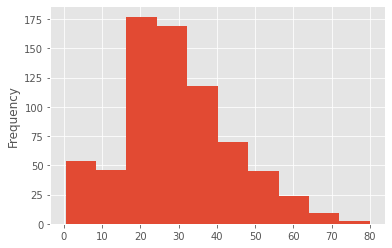

In [96]:
df_Titan_MV.Age.plot(kind = 'hist')

In [98]:
 df_Titan_MV['Age'].fillna(df_Titan_MV['Age'].median(), inplace = True)


In [104]:
pd.set_option('display.max_rows', 900)
df_Titan_MV.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [105]:
df_Titan_MV.Age.median()

28.0

In [106]:
df_Titan_MV.Age.mean()

29.36158249158249